**Welcome!**

This is the analysis of players playing in the English Football Premier League in season 2022/2023. There are 20 teams battling each other for the title of Premier League winner and participation rights in international competitions such as Champions League, Europa League and Europa Conference League (depending on the final placement in the table). 

Important table positions:<br>
- **1st-4th - Champions League Qualification (group stage)**
- **5th-6th - Europa League Qualification (group stage)**
- **7th - Europa Conference League Qualification (group stage)**
- **18th-20th - dropping to Championship (2nd tier English football)**

We'll look at the data to see who has been the best goalscorer this season, what nationalities are represented in the league, how many goals certain players should've scored across the season, which teams are the best at progressive playing and so on. 

It was created fully with Python and it's packages:
<br>
- BeautifulSoup, requests (web scraping)
<br>
- Pandas (data manipulation)
<br>
- NumPy (numerical operations)
<br>
- Matplotlib & Seaborn (data visualization)
<br>

Enjoy!

**Data source**: https://fbref.com/en/comps/9/stats/Premier-League-Stats

<a id="1"></a>
# Setting up the data

<a id="2"></a>
## Importing packages

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

<a id="3"></a>
## Scraping a live Premier League table

In [2]:
# Getting the text from links 
url = requests.get('https://www.skysports.com/premier-league-table').text
url_2 = requests.get('https://www.premierleague.com/tables').text

# Creating the objects of webpages contents
soup = BeautifulSoup(url, 'html.parser')
soup_2 = BeautifulSoup(url_2, 'html.parser')

In [3]:
# Scraping a list of all Premier league clubs
team_names = soup.find_all(class_="standing-table__cell standing-table__cell--name")
team_name_list = []
for name in team_names:
    name = name.getText()
    team_name_list.append(name)

team_name_list = [x.replace('\n', '') for x in team_name_list]

In [4]:
print(team_name_list)

['Manchester City', 'Arsenal', 'Newcastle United', 'Manchester United', 'Liverpool', 'Brighton and Hove Albion', 'Tottenham Hotspur', 'Aston Villa', 'Brentford', 'Fulham', 'Chelsea', 'Crystal Palace', 'Wolverhampton Wanderers', 'Bournemouth', 'West Ham United', 'Nottingham Forest', 'Everton', 'Leeds United', 'Leicester City', 'Southampton']


In [5]:
# Scraping a list of points gained by Prem teams
points = soup_2.find_all(name='td', class_='points')
points_list = []

for point in points:
    point = point.getText()
    point = f'{point} pts'
    points_list.append(point)

In [6]:
# Slicing the list so only relevant values remain
points_list = points_list[:20]
print(points_list)

['85 pts', '81 pts', '69 pts', '66 pts', '65 pts', '58 pts', '57 pts', '57 pts', '53 pts', '51 pts', '43 pts', '43 pts', '40 pts', '39 pts', '37 pts', '34 pts', '32 pts', '31 pts', '30 pts', '24 pts']


In [7]:
# Creating a dataframe of those three lists
prem_table = pd.DataFrame({'Team':team_name_list, 'Points':points_list})
prem_table

,Team,Points
0,Manchester City,85 pts
1,Arsenal,81 pts
2,Newcastle United,69 pts
3,Manchester United,66 pts
4,Liverpool,65 pts
5,Brighton and Hove Albion,58 pts
6,Tottenham Hotspur,57 pts
7,Aston Villa,57 pts
8,Brentford,53 pts
9,Fulham,51 pts


In [8]:
# Setting an index correctly, so it represents the actual league table positions.
prem_table.index += 1 # przestawia index o 1
prem_table

,Team,Points
1,Manchester City,85 pts
2,Arsenal,81 pts
3,Newcastle United,69 pts
4,Manchester United,66 pts
5,Liverpool,65 pts
6,Brighton and Hove Albion,58 pts
7,Tottenham Hotspur,57 pts
8,Aston Villa,57 pts
9,Brentford,53 pts
10,Fulham,51 pts


Since the date of publishing previous report (24-04-23) table has slightly changed. We can see that Manchester City overlapped Arsenal at the top of the table (they're in incredible form right now), Tottenham has dropped to 7th spot, Liverpool found their form and got up to 5th spot. Also Nottingham deserves recognition, as previously they were on 19th location, meaning they'd drop to lower league. 

Southampton's fate is sealed already, mathematically they've no chance to fight for the safe spot, so their relegation is imminent.

<a id="4"></a>
## Converting data to a Pandas dataframe

In [9]:
data = pd.read_csv(r'C:\Users\mateu\OneDrive\Pulpit\data_fbref.txt')

In [10]:
# Putting the .csv file into a pandas dataframe
df = pd.DataFrame(data)

In [11]:
df.shape

(560, 38)

As seen above, the dataset contains 560 rows **(there's 6 more players in the dataset as opposed to 554 players in previous report)**, and 38 columns. Let's get a preview of what the dataset looks like:

In [12]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Playing Time,Playing Time.1,Playing Time.2,Playing Time.3,Performance,Performance.1,Performance.2,Performance.3,Performance.4,Performance.5,Performance.6,Performance.7,Expected,Expected.1,Expected.2,Expected.3,Progression,Progression.1,Progression.2,Per 90 Minutes,Per 90 Minutes.1,Per 90 Minutes.2,Per 90 Minutes.3,Per 90 Minutes.4,Per 90 Minutes.5,Per 90 Minutes.6,Per 90 Minutes.7,Per 90 Minutes.8,Per 90 Minutes.9,Unnamed: 36,-additional
0,Rk▲,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches,-9999
1,1,Brenden Aaronson,us USA,MFFW,Leeds United,22-209,2000,34,28,2311,25.7,1,3,4,1,0,0,2,0,3.7,3.7,4.2,7.9,43,84,148,0.04,0.12,0.16,0.04,0.16,0.14,0.17,0.31,0.14,0.31,Matches,5bc43860
2,2,Che Adams,sct SCO,FW,Southampton,26-310,1996,28,23,1992,22.1,5,3,8,5,0,0,1,0,6.6,6.6,2.8,9.4,17,34,115,0.23,0.14,0.36,0.23,0.36,0.30,0.13,0.42,0.30,0.42,Matches,f2bf1b0f
3,3,Tyler Adams,us USA,MF,Leeds United,24-094,1999,24,24,2156,24.0,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5,19,136,20,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06,Matches,2b09d998
4,4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-237,1997,23,21,1905,21.2,1,0,1,1,0,0,3,0,0.6,0.6,0.4,1.0,16,88,3,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05,Matches,c81d773d


As we can see, there's a lot to do in terms of cleaning/adjusting the dataset. Indexes are not placed properly (both for rows and columns), nationalities are duplicated, double positions aren't very clear, 10 columns are named exactly like another 10 columns (**Gls** to **npxG+xAG**) even though they're calculated as 'per 90 minutes' and the 2 last columns are completely provide no value at all. There's a lot to be done in terms of cleaning, so let's get going!

**Note**: Columns which might be hard to understand or new to you will be explained in Dataset Dictionary section.


<a id="5"></a>
# Dataset Dictionary

**Some values might not be clear or obvious to people not interested in football, so this small section is fully devoted to explaining the meaning behind them**:

**PL**: I'll usually refer to Premier League as PL throughout this analysis.

**Pen**: Penalty Kick

**Yellow Card**: 
    Form of punishment for unsportsmanlike conduct or foul, it can be understood as a meaningful warning. Getting two yellow cards in one match results in a red card.

**Red Card**: 
    Ultimate form of punishment in football, it results in player (sometimes even a manager) leaving the pitch/coach zone and going immediately to the dressing room, where they can't in any way participate in the remainder of the match.

**xGoal (xG)**: 
    Expected Goals is a measure in range of 0 to 1 on whether a given shot will result in a goal. By taking into account a range of factors and historical data, it allows us to identify how many goals a player or team should have scored based on the quality of chances they had during a game. For example, the shot with xG value of 1 means, that statistically speaking given shot has 100% of becoming a goal. I doubt that there's such a shot position, though. Penalty kicks have a fixed xG value of **0.79**, meaning that statistically 79% of penalty kicks should result in a goal.

**xAssistedGoal (xA)**:
    New measure of Expected Assists It's a measure in range of 0 to 1 explaining the likelihood that a given completed pass will become a goal assist. This statistic developed by Opta assigns a likelihood to all passes based on the type of the pass, the location on the pitch, the phase of play, and the distance covered. Players receive xA for every completed pass regardless of whether a shot occurred or not. 

**Progressive Passes**: 
    Completed passes that move the ball towards the opponent's goal line at least 10 yards (9.1 m) from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch.

**Progressive Passes Received**: 
    Progressive Passes which given player has received.
    
**Progressive Carries**:
    Carries that move the ball towards the opponent's goal line at least 10 yards (9.1 m) from its furthest point 
    in the last six passes, or any carry into the penalty area. 
    Excludes carries which end in the defending 50% of the pitch.

**90s** = Minutes Played / 90.
    
**Positions**:
<br>
    GK - Goalkeeper
<br>
    DF - Defender
<br>
    MF - Midfielder
<br>
    FW - Forward
    
Sadly, the dataset doesn't provide more specific position like for example winger, fullback, offensive midfielder etc. When I'll be concentrating on specific players, I'll add up more information to provide context.

<a id="6"></a>
# Data cleaning

<a id="7"></a>
## Table adjusting

Here I'm fixing the first row which should serve as columns index.

In [13]:
df.columns = df.iloc[0]
df = df[1:]

In [14]:
df.head(5)

,Rk▲,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches,-9999
1,1,Brenden Aaronson,us USA,MFFW,Leeds United,22-209,2000,34,28,2311,25.7,1,3,4,1,0,0,2,0,3.7,3.7,4.2,7.9,43,84,148,0.04,0.12,0.16,0.04,0.16,0.14,0.17,0.31,0.14,0.31,Matches,5bc43860
2,2,Che Adams,sct SCO,FW,Southampton,26-310,1996,28,23,1992,22.1,5,3,8,5,0,0,1,0,6.6,6.6,2.8,9.4,17,34,115,0.23,0.14,0.36,0.23,0.36,0.30,0.13,0.42,0.30,0.42,Matches,f2bf1b0f
3,3,Tyler Adams,us USA,MF,Leeds United,24-094,1999,24,24,2156,24.0,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5,19,136,20,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06,Matches,2b09d998
4,4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-237,1997,23,21,1905,21.2,1,0,1,1,0,0,3,0,0.6,0.6,0.4,1.0,16,88,3,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05,Matches,c81d773d
5,5,Nayef Aguerd,ma MAR,DF,West Ham,27-050,1996,17,16,1505,16.7,2,0,2,2,0,0,4,0,2.2,2.2,0.5,2.7,2,24,4,0.12,0.00,0.12,0.12,0.12,0.13,0.03,0.16,0.13,0.16,Matches,288e1e13


Columns are named correctly now. I'll erase the first one (it's a duplicated index) and the last 2 columns. As I wrote before, they provide nothing for the analysis.

In [15]:
df.drop(columns=['Rk▲', 'Matches', '-9999'], inplace=True)
df.head(5)

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
1,Brenden Aaronson,us USA,MFFW,Leeds United,22-209,2000,34,28,2311,25.7,1,3,4,1,0,0,2,0,3.7,3.7,4.2,7.9,43,84,148,0.04,0.12,0.16,0.04,0.16,0.14,0.17,0.31,0.14,0.31
2,Che Adams,sct SCO,FW,Southampton,26-310,1996,28,23,1992,22.1,5,3,8,5,0,0,1,0,6.6,6.6,2.8,9.4,17,34,115,0.23,0.14,0.36,0.23,0.36,0.30,0.13,0.42,0.30,0.42
3,Tyler Adams,us USA,MF,Leeds United,24-094,1999,24,24,2156,24.0,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5,19,136,20,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06
4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-237,1997,23,21,1905,21.2,1,0,1,1,0,0,3,0,0.6,0.6,0.4,1.0,16,88,3,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05
5,Nayef Aguerd,ma MAR,DF,West Ham,27-050,1996,17,16,1505,16.7,2,0,2,2,0,0,4,0,2.2,2.2,0.5,2.7,2,24,4,0.12,0.00,0.12,0.12,0.12,0.13,0.03,0.16,0.13,0.16


Now I'm going to correctly named the mentioned columns, which names are duplicated. To avoid accidental renaming of all 20 columns, I'll split them into two different dataframes (for now).

In [16]:
df_2 = df.iloc[:,:25]
df_3 = df.iloc[:,25:]

Renaming the columns of one of those dataframes:

In [17]:
df_3.rename(columns={'Gls':'Goals/90', 'Ast':'Assists/90',
             'G+A':'Goals+Assists/90', 'G-PK':'Non-Pen Goals/90',
             'G+A-PK':'Non-Pen Goals+Assists/90', 'xG':'xGoals/90',
             'xAG':'xAssistedGoals/90', 'xG+xAG':'xGoals+xAssistedGoals/90',
             'npxG':'Non-Pen xGoals/90', 'npxG+xAG':'Non-Pen xGoals+xAssistedGoals/90'}, inplace=True);


C:\Users\mateu\AppData\Local\Temp\ipykernel_17096\2470445415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.rename(columns={'Gls':'Goals/90', 'Ast':'Assists/90',


And now I'll merge them back again:

In [18]:
df = pd.concat([df_2, df_3], axis=1)
df.head(5)

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90
1,Brenden Aaronson,us USA,MFFW,Leeds United,22-209,2000,34,28,2311,25.7,1,3,4,1,0,0,2,0,3.7,3.7,4.2,7.9,43,84,148,0.04,0.12,0.16,0.04,0.16,0.14,0.17,0.31,0.14,0.31
2,Che Adams,sct SCO,FW,Southampton,26-310,1996,28,23,1992,22.1,5,3,8,5,0,0,1,0,6.6,6.6,2.8,9.4,17,34,115,0.23,0.14,0.36,0.23,0.36,0.30,0.13,0.42,0.30,0.42
3,Tyler Adams,us USA,MF,Leeds United,24-094,1999,24,24,2156,24.0,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5,19,136,20,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06
4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-237,1997,23,21,1905,21.2,1,0,1,1,0,0,3,0,0.6,0.6,0.4,1.0,16,88,3,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05
5,Nayef Aguerd,ma MAR,DF,West Ham,27-050,1996,17,16,1505,16.7,2,0,2,2,0,0,4,0,2.2,2.2,0.5,2.7,2,24,4,0.12,0.00,0.12,0.12,0.12,0.13,0.03,0.16,0.13,0.16


Renaming other columns so they're consistent with naming of the previously renamed columns:

In [19]:
df.rename(columns={'Pos':'Position', 'MP':'Matches Played', 'Min':'Minutes Played',
                   'Gls':'Goals', 'Ast':'Assists', 'G+A':'Goals+Assists', 'G-PK':'Non-Pen Goals',
                   'PK':'Pen Goals', 'PKatt':'Pen Attempts', 'CrdY':'Yellow Cards', 'CrdR':'Red Cards',
                   'xG':'xGoals', 'npxG':'Non-Pen xGoals', 'xAG':'xAssistedGoals', 
                   'npxG+xAG':'Non-Pen xGoals+xAssistedGoals', 'PrgC':'Progressive Carries',
                   'PrgP':'Progressive Passes', 'PrgR':'Progressive Passes Received'}, inplace=True)

In [20]:
df.head(5)

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90
1,Brenden Aaronson,us USA,MFFW,Leeds United,22-209,2000,34,28,2311,25.7,1,3,4,1,0,0,2,0,3.7,3.7,4.2,7.9,43,84,148,0.04,0.12,0.16,0.04,0.16,0.14,0.17,0.31,0.14,0.31
2,Che Adams,sct SCO,FW,Southampton,26-310,1996,28,23,1992,22.1,5,3,8,5,0,0,1,0,6.6,6.6,2.8,9.4,17,34,115,0.23,0.14,0.36,0.23,0.36,0.30,0.13,0.42,0.30,0.42
3,Tyler Adams,us USA,MF,Leeds United,24-094,1999,24,24,2156,24.0,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5,19,136,20,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06
4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-237,1997,23,21,1905,21.2,1,0,1,1,0,0,3,0,0.6,0.6,0.4,1.0,16,88,3,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05
5,Nayef Aguerd,ma MAR,DF,West Ham,27-050,1996,17,16,1505,16.7,2,0,2,2,0,0,4,0,2.2,2.2,0.5,2.7,2,24,4,0.12,0.00,0.12,0.12,0.12,0.13,0.03,0.16,0.13,0.16


Dataset looks considerably cleaner as indexes are appropriately named and irrelevant columns are erased. Let's clean the values now.

We have to remember, that dataframe's shape has changed after cleaning, here's the updated shape:

In [21]:
df.shape

(559, 35)

Here's the basic information about the columns, null values and data types which those columns contain:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 1 to 559
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Player                            559 non-null    object
 1   Nation                            558 non-null    object
 2   Position                          559 non-null    object
 3   Squad                             559 non-null    object
 4   Age                               559 non-null    object
 5   Born                              559 non-null    object
 6   Matches Played                    559 non-null    object
 7   Starts                            559 non-null    object
 8   Minutes Played                    559 non-null    object
 9   90s                               559 non-null    object
 10  Goals                             559 non-null    object
 11  Assists                           559 non-null    object
 12  Goals+Assists         

Every column has an object datatype - it's not good, especially when it comes to operating on numbers. Now, all columns are treated as text values, so any form of calculations won't be possible and will result in an error. I've encountered some errors in the past when trying to format the object datatype columns, so to be 100% sure datatypes are correct, I'm going to change data types of all columns. 

<a id="8"></a>
## Null value

First, I'll fix that null value, so it's not forgotten later on. Let's find it first:

In [23]:
df_null = df[df.isna().any(axis=1)]
df_null

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90
385,David Ozoh,NaN,FW,Crystal Palace,17-353,2005,1,0,1,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Here's David's profile on <a href=https://www.transfermarkt.com/david-ozoh/profil/spieler/865993>Transfermarkt</a>: 

It seems that he holds dual citizenship - English and Spanish. Possibly due to the fact that he hasn't represented any nation on senior level yet, he has no nation assigned. He was actually called up for England U-18 team (hasn't played though), that's why I'll put the 'ENG' to his name:

In [24]:
df.iloc[380]['Nation'] = 'ENG'
df.iloc[380]['Nation']

'ENG'

<a id="9"></a>
## Converting columns's datatypes

Here I'm converting text-valued columns. Their datatype won't change - it'll still be 'object', but now there should not be any errors.

In [25]:
df[['Player', 'Nation', 'Position', 'Squad']] = df[['Player', 'Nation', 'Position', 'Squad']].astype('str')

Converting integer-valued columns:


In [26]:
df[['Born', 'Matches Played', 'Starts', 'Minutes Played', 'Goals', 'Assists', 'Goals+Assists', 'Non-Pen Goals',
       'Pen Goals', 'Pen Attempts', 'Yellow Cards', 'Red Cards', 'Progressive Carries', 'Progressive Passes',
       'Progressive Passes Received']] = df[['Born', 'Matches Played', 'Starts', 'Minutes Played', 'Goals', 'Assists', 'Goals+Assists', 'Non-Pen Goals',
       'Pen Goals', 'Pen Attempts', 'Yellow Cards', 'Red Cards', 'Progressive Carries', 'Progressive Passes',
       'Progressive Passes Received']].astype('int32')


Converting float-based columns:


In [27]:
df[['90s', 'xGoals', 'Non-Pen xGoals', 'xAssistedGoals', 'Non-Pen xGoals+xAssistedGoals', 'Goals/90', 'Assists/90', 
    'Goals+Assists/90', 'Non-Pen Goals/90', 'Non-Pen Goals+Assists/90', 'xGoals/90', 'xAssistedGoals/90',
    'xGoals+xAssistedGoals/90', 'Non-Pen xGoals/90', 'Non-Pen xGoals+xAssistedGoals/90']] = df[['90s', 'xGoals', 
    'Non-Pen xGoals', 'xAssistedGoals', 'Non-Pen xGoals+xAssistedGoals', 'Goals/90', 'Assists/90', 
    'Goals+Assists/90', 'Non-Pen Goals/90', 'Non-Pen Goals+Assists/90', 'xGoals/90', 'xAssistedGoals/90',
    'xGoals+xAssistedGoals/90', 'Non-Pen xGoals/90', 'Non-Pen xGoals+xAssistedGoals/90']].astype('float32')

In [28]:
# All columns now have the desired datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 1 to 559
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Player                            559 non-null    object 
 1   Nation                            559 non-null    object 
 2   Position                          559 non-null    object 
 3   Squad                             559 non-null    object 
 4   Age                               559 non-null    object 
 5   Born                              559 non-null    int32  
 6   Matches Played                    559 non-null    int32  
 7   Starts                            559 non-null    int32  
 8   Minutes Played                    559 non-null    int32  
 9   90s                               559 non-null    float32
 10  Goals                             559 non-null    int32  
 11  Assists                           559 non-null    int32  
 12  Goals+As

<a id="10"></a>
## Cleaning data fields

Let's see again which columns's values should be cleaned:

In [29]:
df.head(5)

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90
1,Brenden Aaronson,us USA,MFFW,Leeds United,22-209,2000,34,28,2311,25.700001,1,3,4,1,0,0,2,0,3.7,3.7,4.2,7.9,43,84,148,0.04,0.12,0.16,0.04,0.16,0.14,0.17,0.31,0.14,0.31
2,Che Adams,sct SCO,FW,Southampton,26-310,1996,28,23,1992,22.100000,5,3,8,5,0,0,1,0,6.6,6.6,2.8,9.4,17,34,115,0.23,0.14,0.36,0.23,0.36,0.30,0.13,0.42,0.30,0.42
3,Tyler Adams,us USA,MF,Leeds United,24-094,1999,24,24,2156,24.000000,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5,19,136,20,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06
4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-237,1997,23,21,1905,21.200001,1,0,1,1,0,0,3,0,0.6,0.6,0.4,1.0,16,88,3,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05
5,Nayef Aguerd,ma MAR,DF,West Ham,27-050,1996,17,16,1505,16.700001,2,0,2,2,0,0,4,0,2.2,2.2,0.5,2.7,2,24,4,0.12,0.00,0.12,0.12,0.12,0.13,0.03,0.16,0.13,0.16


Definitely nation, position and age columns (days of age are not important here).

Every nation has a 3-letter long acronyms, so I'll stick to that convention (having in mind that one entry has already been fixed):

In [30]:
df['Nation'] = df['Nation'].apply(lambda x: x[3:] if(x !='ENG') else x)
df['Nation']

1       USA
2       SCO
3       USA
4       ENG
5       MAR
       ... 
555     ZIM
556     UKR
557     MAR
558     FRA
559     NOR
Name: Nation, Length: 559, dtype: object

Just to make sure the function worked properly:

In [31]:
df.iloc[380]['Nation']

'ENG'

Formatting the Age column, as I mentioned before, days aren't needed there, so I'll just slice them off:

In [32]:
df['Age'] = df['Age'].apply(lambda x: x[:2])
df.head(5)

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90
1,Brenden Aaronson,USA,MFFW,Leeds United,22,2000,34,28,2311,25.700001,1,3,4,1,0,0,2,0,3.7,3.7,4.2,7.9,43,84,148,0.04,0.12,0.16,0.04,0.16,0.14,0.17,0.31,0.14,0.31
2,Che Adams,SCO,FW,Southampton,26,1996,28,23,1992,22.100000,5,3,8,5,0,0,1,0,6.6,6.6,2.8,9.4,17,34,115,0.23,0.14,0.36,0.23,0.36,0.30,0.13,0.42,0.30,0.42
3,Tyler Adams,USA,MF,Leeds United,24,1999,24,24,2156,24.000000,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5,19,136,20,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06
4,Tosin Adarabioyo,ENG,DF,Fulham,25,1997,23,21,1905,21.200001,1,0,1,1,0,0,3,0,0.6,0.6,0.4,1.0,16,88,3,0.05,0.00,0.05,0.05,0.05,0.03,0.02,0.05,0.03,0.05
5,Nayef Aguerd,MAR,DF,West Ham,27,1996,17,16,1505,16.700001,2,0,2,2,0,0,4,0,2.2,2.2,0.5,2.7,2,24,4,0.12,0.00,0.12,0.12,0.12,0.13,0.03,0.16,0.13,0.16


After the text value was modified, converting it to integer datatype will allow me to perform calculations on it.

In [33]:
df['Age'] = df['Age'].astype('int64') 
df['Age']

1      22
2      26
3      24
4      25
5      27
       ..
555    23
556    26
557    30
558    28
559    24
Name: Age, Length: 559, dtype: int64

Some players have 2 different positions assigned as they're more versatile on the pitch than the others, 
so I'm adding a '/' to positions if there is more than one assigned to a player, so there's no ambiguity of any kind:

In [34]:
df['Position'] = df['Position'].apply(lambda x: (x[:2] + '/' + x[2:]) if(len(x) >= 4) else x)
df['Position']

1      MF/FW
2         FW
3         MF
4         DF
5         DF
       ...  
555       DF
556       DF
557    FW/MF
558       DF
559       MF
Name: Position, Length: 559, dtype: object

Just to make sure that no player wasn't assigned three positions:

In [35]:
df['Position'].sort_values(ascending=False)

1      MF/FW
236    MF/FW
214    MF/FW
204    MF/FW
192    MF/FW
       ...  
40        DF
14        DF
67        DF
350       DF
222       DF
Name: Position, Length: 559, dtype: object

There is no player with 3 positions assigned, so it's good. Some players occasionally play in 3 different formations, but that's usually due to formation changes during game, so that's probably why it isn't noted in Position column.

I'll create 2 additional columns which will calculate the difference between xGoals and goals scored, and xAssists and assists provided:

In [36]:
df['xGoals-Goals'] = df['Goals'] - df['xGoals']
df['xAssistedGoals-Assists'] = df['Assists'] - df['xAssistedGoals']

Taking Brenden Aaronson as an example, we can see that he should've scored 3.6 goals throughout the season based on the situations he was in, but scored only once. That means, he scored 2.6 goals less than he should. Same goes for assists, he should've given 4.2 assists, but has given only 3, so the difference is 1.2.

In [37]:
df[['Player', 'Goals', 'xGoals', 'Assists', 'xAssistedGoals', 'xGoals-Goals', 'xAssistedGoals-Assists']].head(1)

,Player,Goals,xGoals,Assists,xAssistedGoals,xGoals-Goals,xAssistedGoals-Assists
1,Brenden Aaronson,1,3.7,3,4.2,-2.7,-1.2


<a id="11"></a>
# Analysis & Insights

<a id="12"></a>
## Descriptive statistics

To begin, here are some descriptive statistics about the whole dataset

In [38]:
df.describe()

,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,26.284436,1996.125224,19.110912,14.089445,1266.420394,14.071915,1.747764,1.211091,2.958855,1.618962,0.128801,0.169946,2.361360,0.053667,1.842934,1.709481,1.323435,3.034347,21.466905,48.416816,47.948122,0.104597,0.074419,0.179052,0.098819,0.173238,0.130984,0.085456,0.216655,0.124866,0.210483,-0.095170,-0.112343
std,4.317127,4.310368,11.123059,11.490648,983.527154,10.928390,3.424410,2.036007,4.827871,3.024938,0.643030,0.772344,2.476052,0.233372,3.011822,2.619565,1.963850,4.132827,26.227675,52.995602,65.176319,0.175985,0.126358,0.248635,0.164752,0.239734,0.160211,0.119812,0.225064,0.150305,0.216530,1.279124,1.040803
min,16.000000,1984.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.600000,-7.600000
25%,23.000000,1993.000000,10.000000,3.500000,377.000000,4.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.300000,2.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.050000,0.020000,0.050000,-0.600000,-0.500000
50%,26.000000,1996.000000,19.000000,12.000000,1098.000000,12.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.800000,0.800000,0.600000,1.500000,12.000000,30.000000,21.000000,0.000000,0.000000,0.090000,0.000000,0.090000,0.070000,0.050000,0.150000,0.070000,0.150000,-0.100000,-0.100000
75%,30.000000,1999.000000,29.000000,23.000000,2057.000000,22.849999,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,4.000000,0.000000,2.200000,2.200000,1.800000,4.200000,30.000000,75.000000,68.000000,0.150000,0.110000,0.270000,0.140000,0.270000,0.180000,0.130000,0.310000,0.170000,0.310000,0.200000,0.000000
max,38.000000,2007.000000,36.000000,36.000000,3240.000000,36.000000,36.000000,16.000000,43.000000,29.000000,7.000000,7.000000,12.000000,2.000000,27.200001,21.799999,15.600000,26.700001,168.000000,257.000000,492.000000,1.490000,0.990000,2.490000,1.490000,2.490000,0.920000,1.950000,2.270000,0.900000,2.270000,8.799999,3.800000


That already says a lot, we can see that there's a 22 years gap between the oldest and youngest player in the league, that there's a player who has 43 goal contributions this season, which is a lot (we'll definitely get to that man later on). Average player's age in the Premier League is ~ 26. Considering that senior career starts usually around the age of 17-19 and ends around the age of 34-36 it seems about normal.

<a id="13"></a>
## Starts and minutes played

There's also a player that hasn't started a single match this season, let's see who that is:

In [39]:
filt = df['Starts'] == 0
low_mins_players = df[filt][['Player', 'Minutes Played', 'Age']].sort_values(by=['Minutes Played', 'Age'])
low_mins_players

,Player,Minutes Played,Age
370,Ethan Nwaneri,1,16
385,David Ozoh,1,17
317,Marquinhos,1,20
178,Tyrese Francois,1,22
109,Conor Coventry,1,23
...,...,...,...
387,Cole Palmer,150,21
472,Emile Smith Rowe,156,22
199,Sergio Gómez,175,22
361,Reiss Nelson,181,23


There are 69 players who had played only one minute this season! There can be plenty of reasons for that - long-term injuries, falling out of favor (manager and/or tactics had changed), they've already moved to another club, either on loan or permanent transfer and what I think is the most common cause - these players are still developing, they're very early in their careers. So even though they've very few minutes in the Premier League, they might play regularly in junior leagues (like for example Premier League U-20 (Under 20 yrs of age).   

In [40]:
print('The average age of players who haven\'t started a single match this season is', round((low_mins_players['Age'].mean()), 2), 'years old.')

The average age of players who haven't started a single match this season is 23.84 years old.


Data shows that these are mostly young players.

Let's also see if there's anyone who hasn't played a single minute this season:

In [41]:
filt = df['Minutes Played'] == 0
df[filt]['Player'].count()

0

Apparently every player who's present in the dataset has played at least a minute this season. 

Let's get back to the age issue, and see what's the age distribution in Premier League this season:

<a id="14"></a>
## Age distribution

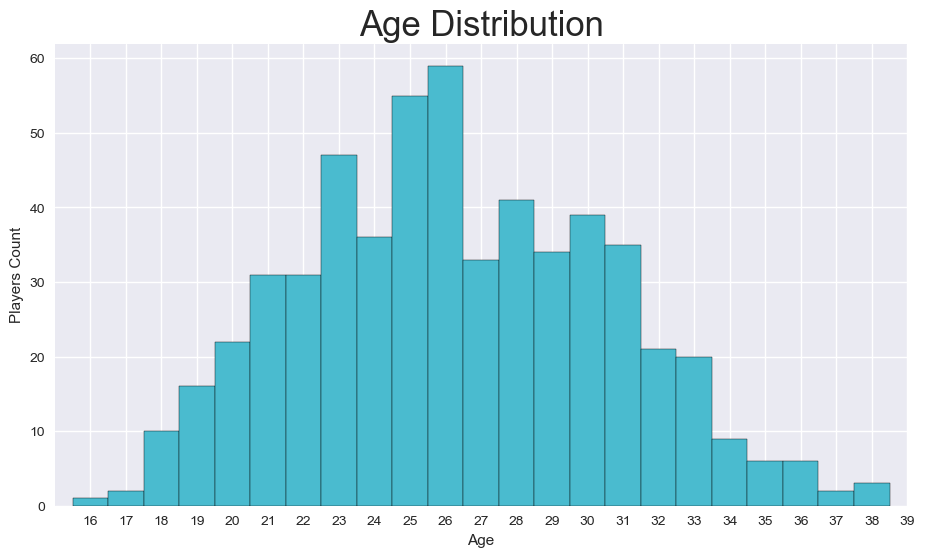

In [42]:
hist_data = list(df['Age'])
bins = np.arange(16, 40 - 0.5)
color = '#4ABBCF'

plt.figure(figsize=(11,6))
plt.hist(x=hist_data, bins=bins, color=color, edgecolor='black', align='left')

plt.title('Age Distribution', size=25)
plt.xlabel('Age')
plt.ylabel('Players Count')
plt.xticks(bins)
plt.xlim([15, 39]);

As we can see, age is normally distributed with a small advantage on younger players side. Data shows there's no ideology in the league to go specifically towards developing youth players or acquiring very experienced players. I wouldn't say there's anything really out of the ordinary.

<a id="15"></a>
### Average age across clubs

Let's see how the average age across teams presents itself:

In [43]:
clubs_df = df.groupby(['Squad'])
team_ages = clubs_df['Age'].mean().sort_values()
team_ages

Squad
Brighton           24.464286
Arsenal            24.692308
Leeds United       25.068966
Southampton        25.500000
Chelsea            25.500000
Brentford          25.800000
Wolves             25.937500
Bournemouth        26.129032
Liverpool          26.222222
Everton            26.285714
Manchester City    26.391304
Leicester City     26.392857
Crystal Palace     26.461538
Manchester Utd     26.500000
Tottenham          26.518519
Aston Villa        27.307692
Fulham             27.379310
Newcastle Utd      27.769231
West Ham           27.800000
Nott'ham Forest    27.818182
Name: Age, dtype: float64

And now let's visualize this:

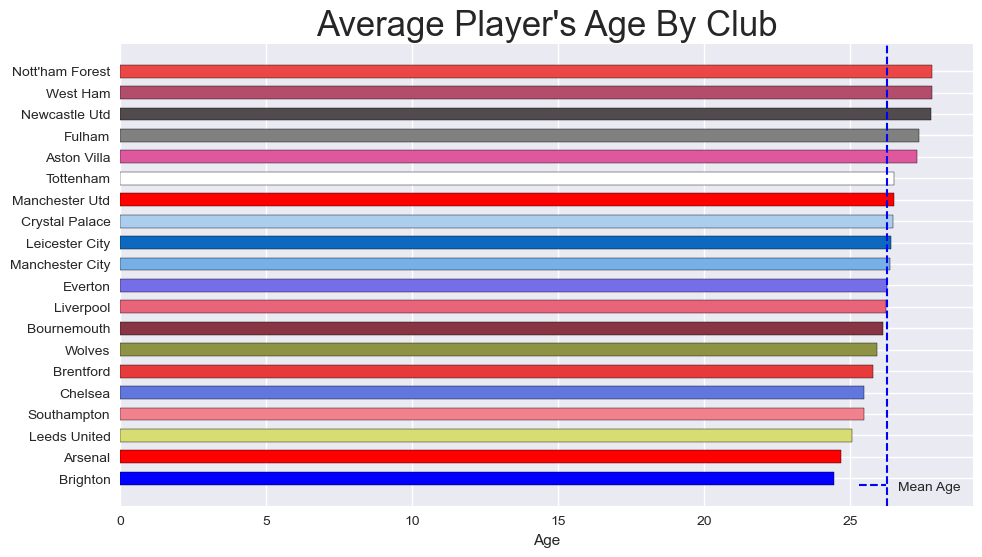

In [45]:
mean_age = df['Age'].mean()
colors = ['blue', 'red', '#D7DC73', '#F1828D', '#6177DD', '#E73B3B', '#8E9344', '#873542', '#E8647A', '#766EE8', '#76B0E7',
          '#0D69BF', '#ABCDEE', 'red', 'white', '#DF589E', 'grey', '#514A4E', '#B24E6C', '#EC4747']

plt.figure(figsize=(11,6))
plt.barh(y=team_ages.index, width=team_ages, height=0.6, color=colors, edgecolor='black', )

plt.title('Average Player\'s Age By Club', size=25)
plt.xlabel('Age')
plt.axvline(mean_age, color='blue', label='Mean Age', linewidth=1.5, linestyle='--')
plt.legend(loc='lower right');

Here we can compare it with actual PL table:

In [58]:
prem_table

,Team,Points
1,Manchester City,85 pts
2,Arsenal,81 pts
3,Newcastle United,69 pts
4,Manchester United,66 pts
5,Liverpool,65 pts
6,Brighton and Hove Albion,58 pts
7,Tottenham Hotspur,57 pts
8,Aston Villa,57 pts
9,Brentford,53 pts
10,Fulham,51 pts


There might be an assumption that younger players might have more of a hunger for winning. Looking only at Arsenal's players average age and their table position - that seems likely. But Leeds United are 3rd youngest team in the league, and they're just 18th, so it's obvious that age is not a deciding factor in this regard. Another sign of that is Newcastle' position - 3rd oldest squad and 3rd position in the league. 

I'd say it's good to have both youngsters and experienced players - in good proportions. Of course the quality of players, regardless of their age matters a lot, hence the difference in table between Arsenal and Leeds. 

There's a 3 years difference between West Ham's and Arsenal's players age average. Considering that usual footballing career lasts about 16-18 years, that's quite a difference.


Additionally, the mean age across the league is:

In [61]:
round(df['Age'].mean(),2)

26.28

Going back to the graph - it looks like this time Brighton has the youngest players in the league on average. That means that some young players, not used in the league before have made their debuts for this club. Let's see:

In [56]:
filt = df['Squad'] == 'Brighton'
df.loc[filt][['Player', 'Nation', 'Position', 'Age', 'Minutes Played']].sort_values(by=['Age', 'Minutes Played'])

,Player,Nation,Position,Age,Minutes Played
71,Facundo Buonanotte,ARG,FW/MF,18,356
166,Evan Ferguson,IRL,FW,18,757
349,Andrew Moran,IRL,FW,19,12
35,Yasin Ayari,SWE,MF,19,22
88,Julio César Enciso,PAR,FW/MF,19,646
400,Cameron Peupion,AUS,MF,20,6
373,Odeluga Offiah,ENG,DF,20,25
453,Jeremy Sarmiento,ECU,MF,20,176
101,Levi Colwill,ENG,DF,20,952
193,Billy Gilmour,SCO,MF,21,454


Apparently <a href="https://www.transfermarkt.pl/odel-offiah/leistungsdaten/spieler/567597">O. Offiah</a> has debuted in the Prem on 26th of April, which would explain the Brighton's shift on the above graph. Other players debuted prior to 24-04-2023.

<a id="16"></a>
## Nationalities in PL

Let's see how many nationalities are represented in the PL:

In [62]:
df['Nation'].nunique()

63

There are 63 of them, that's almost 1/3 of all countries in the world! That's a lot of diversity. Let's check what are the top 10 nations (selected by a number of players representing these nations):

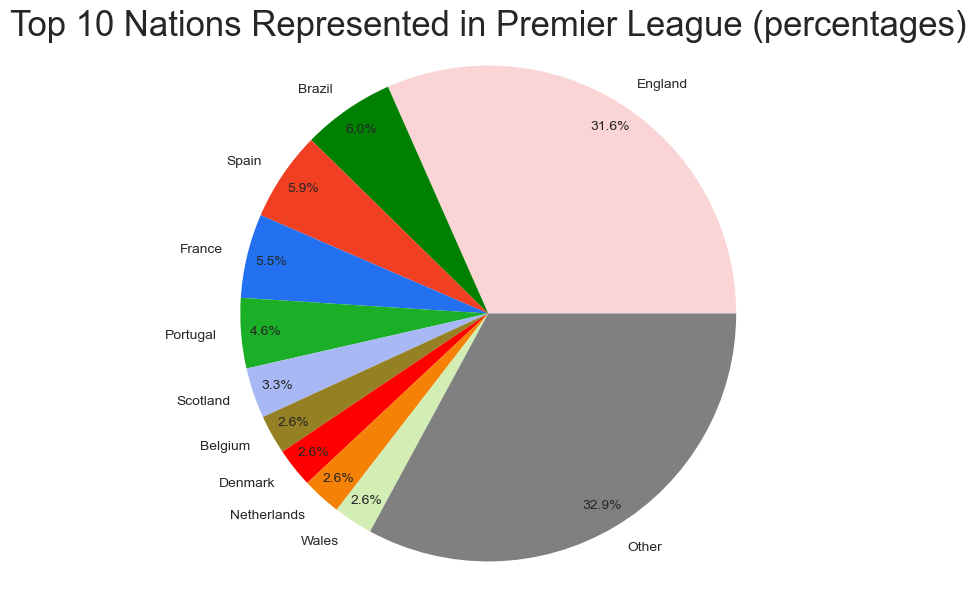

In [63]:
nations_df = df.groupby(['Nation'])
top_10_nat_plot = dict(nations_df['Player'].count().sort_values(ascending=False).head(10))
rest_nats = nations_df['Player'].count().sort_values(ascending=False).tail(52)

other_nats = 0
for i in rest_nats:
    other_nats += i

top_10_nat_plot['Other'] = other_nats

data = []
labels = ['England', 'Brazil', 'Spain', 'France', 'Portugal', 'Scotland', 'Belgium', 'Denmark', 'Netherlands', 'Wales', 'Other']
for value in top_10_nat_plot.values():
    data.append(value)


colors = ['#FBD5D5', 'green', '#F03F23', '#2371F0', '#1AAF27', '#A7B8F4', '#958123', '#FF0000', '#F58106', '#D2EEB4', 'grey']

plt.figure(figsize=(13,7))
plt.pie(x=data, labels=labels, autopct='%1.1f%%', pctdistance=0.9, colors=colors, radius=1.15)

plt.title('Top 10 Nations Represented in Premier League (percentages)', size=25);

Top 10 nations contain slightly more than 2/3 of all PL players. England's part shouldn't come as a surprise - it's their league. On first sight, the 2nd spot seems kind of out of place, but it's not. Brazil is considered to be a capital of world's football, it's jokingly said football's their religion. So naturally, as they train all the time on the streets, their abilities develop. For some of these youngsters, it's the matter of time until they get scouted and brought to european clubs. 

Presence of Wales and Scotland is expected. Even though these countries have their own separate leagues, their quality is no match for the PL (maybe except Scottish clubs - Celtic Glasgow & Glasgow Rangers). What's interesting is that there are some clubs from UK, but outside of England, which compete in the english football (like Welsh clubs Swansea City A.F.C. or Cardiff City F.C.).

Other countries - Spain, France, Portugal, Belgium, Denmark and Netherlands are also known for their high quality football so naturally players from there happen to move to England to change environments or progress their career. PL is considered by many to be the best football league in the world, so that's hardly shocking.

<a id="17"></a>
## Goals, Assists and Penalties

How many goals and assists were scored and given respectively?

In [64]:
print(df[['Goals', 'Assists']].sum(), '\n')

0
Goals      977
Assists    677
dtype: int64 



Let's dive deeper into the goals issue. It's interesting how many of these goals are scored through penalties, which are considered to be the easiest goals scored:

In [65]:
print('Goals without assists:', round((df['Assists'].sum() / df['Goals'].sum()) * 100, 2), '%', '\n')
print('Penalty Goals % of All Goals', round((df['Pen Goals'].sum() / df['Goals'].sum()) * 100, 2), '%')

Goals without assists: 69.29 % 

Penalty Goals % of All Goals 7.37 %


We can see that 30.71% of the goals were scored without a direct assist. That might be due to opponent's mistake, accidental touch by an opponent (when a struck ball would ricochet off of a defender for example) or just a solo play, when the previous pass happened too long ago to be counted as an assist. Not counting the penalties, that number goes down to 23.34%. Almost nothing changed over the last month, differences are barely noticeable. 

<a id="18"></a>
## Premier League Top 20 Goalscorers + Goals/90

Let's see who the most productive PL goalscorers are and how many goals they statistically score per game:

In [80]:
top_20 = df[['Player','Squad', 'Goals', 'Minutes Played', 'Goals/90']].sort_values(by='Goals', ascending=False).head(20)

# Creating labels for scatterplot

# List of names from top 20 df
last_names = []
for i in top_20['Player']:
    if i == 'Alexis Mac Allister':
        i = i[7:]
    elif i == 'Son Heung-min':
        i = i[:3]
    else:
        i = i.rsplit()[-1]
    last_names.append(i)
    
# List of goals/90 scored by these players
g_per_90 = list(top_20['Goals/90'])
g_per_90_s = []
for i in g_per_90:
    i = round(i, 2)
    i = str(i)
    g_per_90_s.append(i)


top_20_g_per_90 = []

# Joining two lists together
for name, g_90 in zip(last_names, g_per_90_s):
    i = f'{name} {g_90}'
    top_20_g_per_90.append(i)

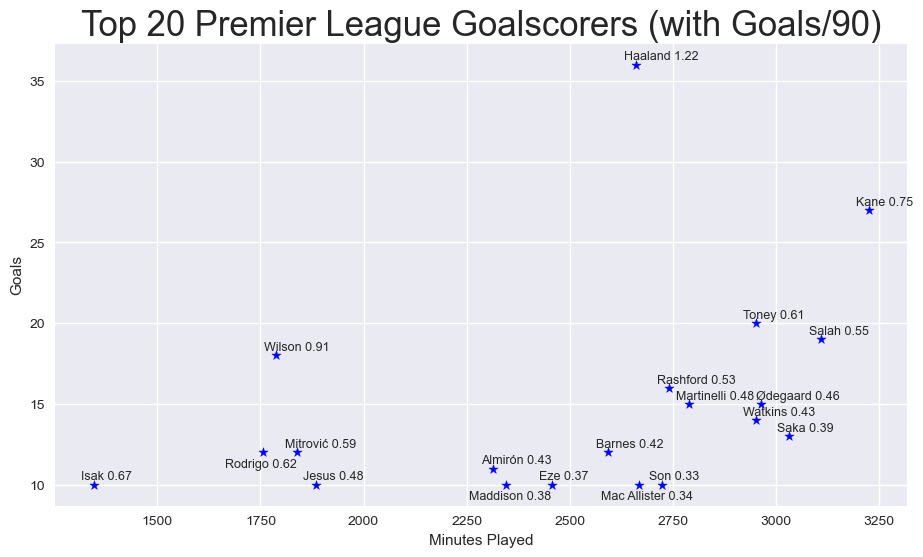

In [88]:
x=list(top_20['Minutes Played'])
y=list(top_20['Goals'])

plt.figure(figsize=(11,6))
# Plotting a scatterplot using created lists
plt.scatter(x=x, y=y, marker='*', c='blue')

plt.title('Top 20 Premier League Goalscorers (with Goals/90)', size=25)
plt.xlabel('Minutes Played')
plt.ylabel('Goals')

# Assigning labels and moving labels which overlap
for i, player in enumerate(top_20_g_per_90):
    if player == 'Ødegaard 0.46':
        plt.annotate(player, (x[i]-10, y[i]+0.3), fontsize=9)
    elif player not in('Mac Allister 0.34', 'Maddison 0.38', 'Rodrigo 0.62'):
        plt.annotate(player, (x[i]-30, y[i]+0.3), fontsize=9)
    else:
        plt.annotate(player, (x[i]-90, y[i]-0.9), fontsize=9);


In [89]:
filt = df['Player'] == 'Erling Haaland'
df.loc[filt]

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
212,Erling Haaland,NOR,FW,Manchester City,22,2000,33,32,2662,29.6,36,7,43,29,7,7,5,0,27.200001,21.799999,4.8,26.700001,31,57,144,1.22,0.24,1.45,0.98,1.22,0.92,0.16,1.08,0.74,0.9,8.799999,2.2


<a href="https://www.transfermarkt.com/erling-haaland/leistungsdatendetails/spieler/418560">E. Haaland' Career Stats</a>

As the data shows, no one can match E. Haaland incredible record this season. Only Harry Kane comes close, and he's still really far from Norwegian forward. Dominant and attacking style of football played by Manchester City surely plays it's part, but E. Haaland is a phenomenon since he left his native league and joined RB Salzburg (Austria) in 2019.  Even though it's his first season in English Premier League, he's already crushing the other top strikers, ratio of 1.22 goals scored per 90 minutes is considered almost unachievable, especially after almost 2200 minutes played. He's also got a 100% penalty kicks conversion - we'll get to that later on.

In [90]:
filt = df['Player'] == 'Miguel Almirón'
df.loc[filt]

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
17,Miguel Almirón,PAR,FW,Newcastle Utd,29,1994,32,27,2314,25.700001,11,2,13,11,0,0,2,0,6.9,6.9,2.9,9.8,69,117,239,0.43,0.08,0.51,0.43,0.51,0.27,0.11,0.38,0.27,0.38,4.1,-0.9


<a href=https://www.transfermarkt.com/miguel-almiron/leistungsdatendetails/spieler/272999>M. Almiron' Career Stats</a>: 

M. Almiron (Newcastle Utd) deserves a mention here. Amazing season by his standards, possibly the best one in his whole career. His 2nd best record in the PL was in 19/20 season (4 goals, 2 assists). With 2 games to go, he's on 11 goals and 2 assist. Great, and somewhat unexpected progress from the Paraguayan winger. There can be plenty reasons for that, new coach & owners, tactics which fit him more, or just some sort of internal breakthrough, which allowed him to go even higher. Nevertheless, impresssive season by him.

In [91]:
filt = df['Player'] == 'Callum Wilson'
df.loc[filt]

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
542,Callum Wilson,ENG,FW,Newcastle Utd,31,1992,29,20,1788,19.9,18,5,23,15,3,3,4,0,16.799999,14.4,2.7,17.1,25,19,113,0.91,0.25,1.16,0.76,1.01,0.84,0.14,0.98,0.72,0.86,1.200001,2.3


Another worth mentioning rise in Goals/90 is Newcastle United' Callum Wilson. 23 goal contributions in a single season is a great achievement, especially considering the amount of minutes he's played. 1.16 goal contributions each 90 minutes he's playing is a sensational record. Just as M. Almirón, he's working wonders this season, with possibly more contributions in the last 2 games remaining.

<a id="19"></a>
## Premier League Top 10 Assistants + Assists/90

**Note**: I've decided to show less assistants, since their numbers aren't that different as in goalscorers scenario.

Analogically to previous graph, here's the information about 10 best assistants in PL this season:

In [92]:
top_10_as = df[['Player','Squad', 'Assists', 'Minutes Played', 'Assists/90']].sort_values(by=['Assists', 'Minutes Played'], ascending=[False, True]).head(10)

last_names_as = []
for i in top_10_as['Player']:
# Exception handling
    if i == 'Kevin De Bruyne':
        i = i[6:]
    else:
        i = i.rsplit()[-1]
    last_names_as.append(i)
    

as_per_90 = list(top_10_as['Assists/90'])
as_per_90_s = []
for i in as_per_90:
    i = round(i, 2)
    i = str(i)
    as_per_90_s.append(i)


top_10_as_per_90 = []

for name, as_90 in zip(last_names_as, as_per_90_s):
    i = f'{name} {as_90}'
    top_10_as_per_90.append(i)

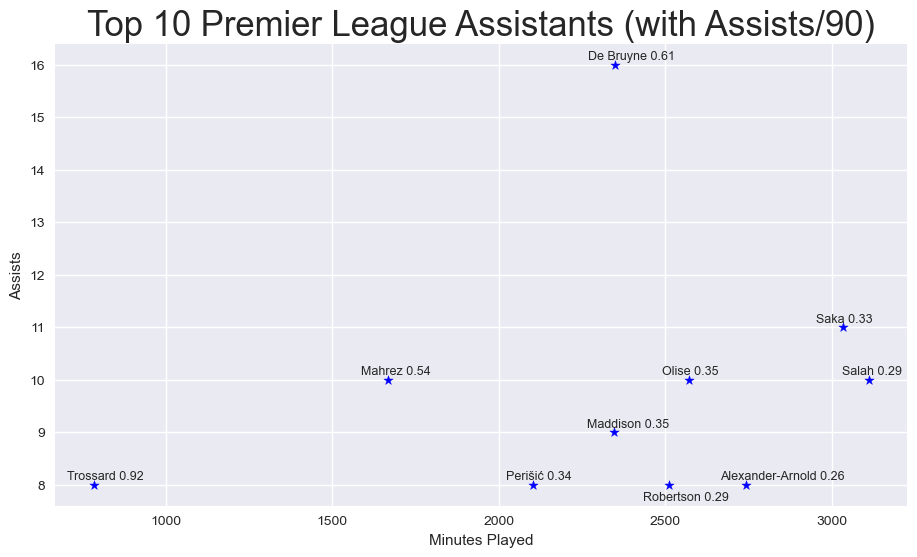

In [95]:
x=list(top_10_as['Minutes Played'])
y=list(top_10_as['Assists'])

plt.figure(figsize=(11,6))
plt.scatter(x=x, y=y, marker='*', c='blue')

plt.title('Top 10 Premier League Assistants (with Assists/90)', size=25)
plt.xlabel('Minutes Played')
plt.ylabel('Assists')

for i, player in enumerate(top_10_as_per_90):
    if player != 'Robertson 0.29':
        plt.annotate(player, (x[i]-80, y[i]+0.1), fontsize=9)
    else:
        plt.annotate(player, (x[i]-80, y[i]-0.3), fontsize=9)

As much as Haaland is great with goalscoring, as great is Kevin De Bruyne (KDB) in assisting. Called by many as one of the best midfielders in a world with incredible passing range, KDB consistently has very good numbers related to passing. It comes as no surprise, that KDB and Haaland both play for Manchester City, they work great with each other. 

What's also interesting is Martin Ødegaard and Bukayo Saka' presence in both of the graphs. Shows how crucial they're to Arsenal's great season, and how much responsibility is on their shoulders. 

Liverpool's Mohamed Salah is also present in both graphs, very consistently remaining one of the best players in the league for several years now.

In [96]:
filt = df['Player'].isin(['Martin Ødegaard', 'Bukayo Saka', 'Leandro Trossard'])

df.loc[filt]

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
442,Bukayo Saka,ENG,FW,Arsenal,21,2001,36,35,3032,33.700001,13,11,24,11,2,3,6,0,10.9,8.7,8.1,16.9,168,104,492,0.39,0.33,0.71,0.33,0.65,0.32,0.24,0.56,0.26,0.50,2.1,2.9
512,Leandro Trossard,BEL,FW/MF,Arsenal,28,1994,18,8,783,8.700000,1,8,9,1,0,0,0,0,1.6,1.6,4.2,5.8,32,50,93,0.11,0.92,1.03,0.11,1.03,0.18,0.49,0.67,0.18,0.67,-0.6,3.8
513,Leandro Trossard,BEL,FW/MF,Brighton,28,1994,16,16,1315,14.600000,7,2,9,7,0,0,1,0,4.4,4.4,2.1,6.5,40,67,118,0.48,0.14,0.62,0.48,0.62,0.30,0.14,0.45,0.30,0.45,2.6,-0.1
559,Martin Ødegaard,NOR,MF,Arsenal,24,1998,35,35,2963,32.900002,15,7,22,15,0,0,4,0,9.9,9.9,7.7,17.6,76,254,179,0.46,0.21,0.67,0.46,0.67,0.30,0.23,0.53,0.30,0.53,5.1,-0.7


The Leandro Trossard case might need an explanation. He left Brighton in January and joined Arsenal. Above we can see two Leandro entries, but it's the same player, there's a different team. Such high assists/90 ratio is calculated only from his Arsenal spell. If it was counted from the whole season, his assists/90 ratio would be much lower:

In [98]:
print(round(10 / 23.3, 2), 'assists/90 mins')

0.43 assists/90 mins


It's still a great accomplishment, unfortunately not as impressive as little over an assist per 90 mins.

<a id="20"></a>
## Penalty kicks in-depth

To begin, let's look at all players who took a penalty (no matter if successfully) this season:

In [99]:
filt = (df['Pen Attempts'] >= 1)
pens_df = df[['Player', 'Squad', 'Position', 'Pen Goals', 'Pen Attempts']][filt].sort_values(by='Pen Attempts', ascending=False)
pens_df['Pen Scoring Ratio'] = round((pens_df['Pen Goals'] / pens_df['Pen Attempts']) * 100, 2)
pens_df

,Player,Squad,Position,Pen Goals,Pen Attempts,Pen Scoring Ratio
506,Ivan Toney,Brentford,FW,6,7,85.71
212,Erling Haaland,Manchester City,FW,7,7,100.00
304,Alexis Mac Allister,Brighton,MF,6,6,100.00
347,Aleksandar Mitrović,Fulham,FW,3,6,50.00
259,Harry Kane,Tottenham,FW,5,6,83.33
53,Saïd Benrahma,West Ham,FW/MF,4,4,100.00
531,James Ward-Prowse,Southampton,MF,2,4,50.00
443,Mohamed Salah,Liverpool,FW,2,4,50.00
247,Brennan Johnson,Nott'ham Forest,FW/MF,1,3,33.33
542,Callum Wilson,Newcastle Utd,FW,3,3,100.00


And now let's graph it:

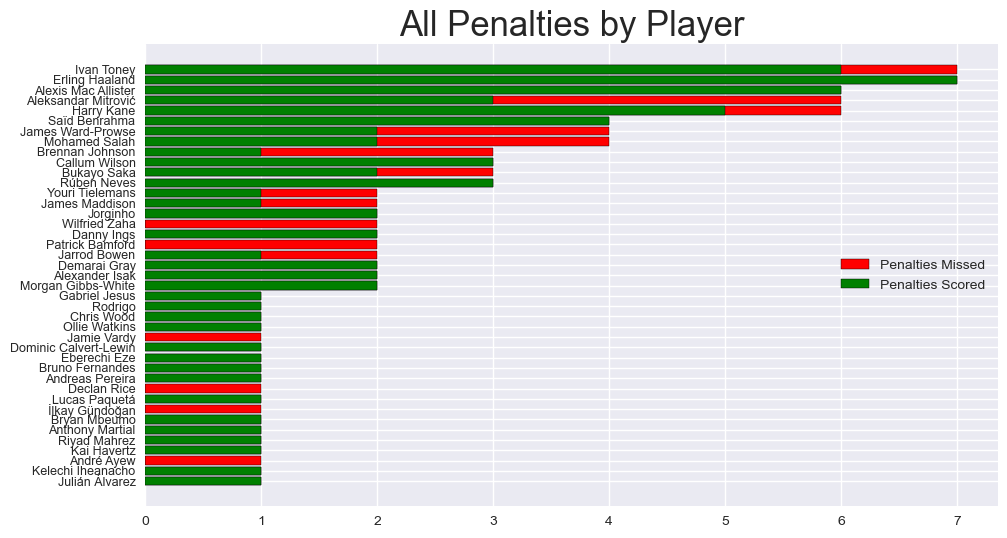

In [100]:
pen_g_list = list(pens_df['Pen Goals'])
pen_att_list = list(pens_df['Pen Attempts'])
pen_players_list = list(pens_df['Player'])

plt.figure(figsize=(11,6))
plt.barh(pen_players_list, pen_att_list, color='red', edgecolor='black')
plt.barh(pen_players_list, pen_g_list, color='green', edgecolor='black')

plt.yticks(fontsize=9)
plt.title('All Penalties by Player', size=25)

plt.legend(['Penalties Missed', 'Penalties Scored'], loc='center right')
plt.gca().invert_yaxis()

The graph is quite self-explanatory. Previously, in the Dataset Dictionary section I've remarked that penalty kick is set at 0.79 xG. On top of the above graph, I'd like to see if this season's penalty scoring ratio is close to the fixed rate:

In [101]:
pens_attempted = df['Pen Attempts'].sum()
pens_scored = df['Pen Goals'].sum()
print(round(pens_scored / pens_attempted, 2))

0.76


This season's penalty scoring ratio is 0.76. It's really close to the penalty kick's fixed xG value (few years back xG fixed value of penalty kick was actually the 0.76). The conclusion is that penalties this season are executed little bit more poorly than they should.

<a id="21"></a>
## Progression Plays (by club & position)

Measuring progression on the pitch for me is a reflection of how detailed football analysis became over the recent years. It's so great that we can have open access to such specific data and use it for personal needs. Let's take a look into progression by team:

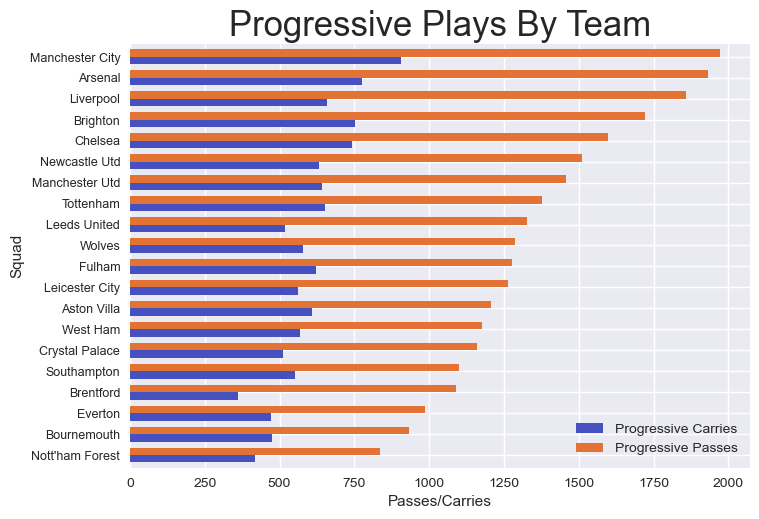

In [102]:
progression_by_club = clubs_df[['Progressive Carries', 'Progressive Passes']].sum().sort_values(by=['Progressive Passes', 'Progressive Carries'])
colors = ['#4651BF', '#E37334']

barhplot = progression_by_club.plot.barh(width=0.7, color=colors)

plt.title('Progressive Plays By Team', size=25)
plt.xlabel('Passes/Carries')
plt.yticks(fontsize=9)
plt.legend();

In [103]:
prem_table

,Team,Points
1,Manchester City,85 pts
2,Arsenal,81 pts
3,Newcastle United,69 pts
4,Manchester United,66 pts
5,Liverpool,65 pts
6,Brighton and Hove Albion,58 pts
7,Tottenham Hotspur,57 pts
8,Aston Villa,57 pts
9,Brentford,53 pts
10,Fulham,51 pts


We can see that progressive playing doesn't have to be related to a position in a table (although it would be true in this season Arsenal' and Manchester City' case, as they're on top of both measures). It all comes mostly to general playstyle, which is imposed by a manager and his staff, players predispositions and general possession of the ball during the game. Less time with a ball = less time to progress with the ball = lower numbers.


And here's the progression by position:

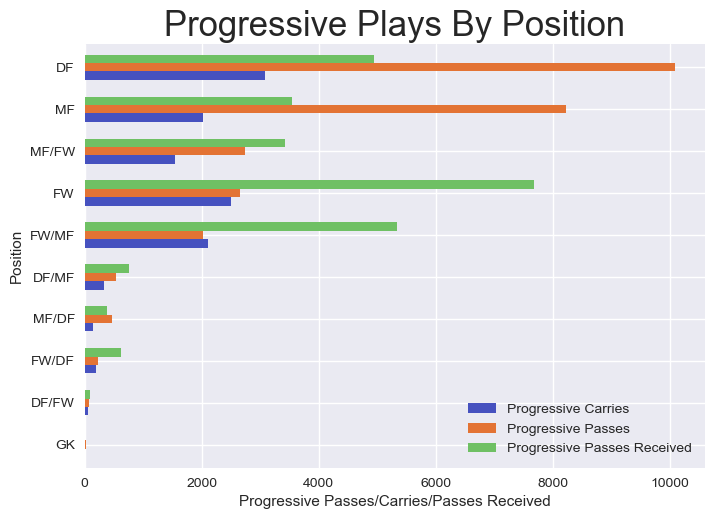

In [104]:
positions_df = df.groupby(['Position'])
progression_by_position = positions_df[['Progressive Carries', 'Progressive Passes', 'Progressive Passes Received']].sum().sort_values(by=['Progressive Passes', 'Progressive Carries', 'Progressive Passes Received'])
colors = ['#4651BF', '#E37334', '#6FC064']

barhplot = progression_by_position.plot.barh(width=0.6, color=colors)

plt.title('Progressive Plays By Position', size=25)
plt.xlabel('Progressive Passes/Carries/Passes Received')
plt.ylabel('Position')
plt.legend(loc='lower right');

Reason why defenders are on top of the chart (apart from Prog_Passes_Received) is explained by their default position. What that means, is they usually have the most space to carry the ball for some distance or enough time to choose a recipient of a progressive pass. On top of that, modern football (with exceptions of course) requires defenders, both central as well as wide to be the first attackers. Still, they've quite a big number of Prog_Passes_Received. That might be due to their presence in opponent's penalty area. When there's a corner kick about to be taken, naturally defenders get in there to create danger and possibly a goal. As defenders are usually the tallest formation on the field, it's only natural that they've got better presence and possibility to score a header - as we know every completed pass in opponent's penalty box is considered progressive. But what's the biggest factor here, it's the playstyle of wide defenders. They naturally move up and down the field both passing and carrying progressively and receiving lots of progressive passes. 

Midfielders are mainly responsible for moving the ball up to the final third of the pitch and creating opportunities. Even though they usually make the most passes during the game, they don't have as much freedom as defenders to move the ball forward. Besides progressive passes, there's a lot of side-passing, back-passing, all to remain in control of the ball. It's also much harder to pass to a forward, when there's an opponent's defending block to interrupt the passes. There's basically bigger pressure from the opposing side in midfield, so that's most likely why the numbers are lower across all the categories comparing to defenders.

Forwards are usually the players who have the least passes in the game (maybe besides wingers, who are considered FW in this dataset), so the low number of progressive passes is expected here. About progressive carries - we've to remember that every carry entering the penalty is considered progressive, no matter the distance ran with the ball, that's why the number of those carries is that high, even though forward players are constantly close to opposing defenders. As they're responsible mainly for scoring goals, it's inevitable that they're going to be the ones who receive the the most progressive passes. That's part of their position and I'd say it's not gonna change unless football's rules are overturned one day (hopefully not).

Mixed position groups shouldn't be interpreted as 2 equally represented positions, but more as **'dominant position/secondary position'**. Some players regularly switch for example from midfield to forward, but most of them play on the secondary position only when there's a special assignment for them in another part of the pitch. That's why the bars on the graph look so similar to singular positions when compared with the dominant ones.

Overall, positions part aren't really shocking in this aspect, what surprised me, is the realization how much defenders are pushing up the field. It's might come of as obvious, that the attack has to start somewhere after recovering the ball, but the sheer number surprised me a bit. 


Let's get back to the progression rates from the defenders, I'd like to see how does the top 10 of defenders by progression look like, and how many of them are the wide defenders:

In [105]:
filt = df['Position'] == 'DF'
df.loc[filt][['Player', 'Position', 'Squad', 'Progressive Passes', 'Progressive Carries']].sort_values(by='Progressive Passes', ascending = False).head(10)

,Player,Position,Squad,Progressive Passes,Progressive Carries
511,Kieran Trippier,DF,Newcastle Utd,237,33
536,Ben White,DF,Arsenal,235,57
556,Oleksandr Zinchenko,DF,Arsenal,227,67
14,Trent Alexander-Arnold,DF,Liverpool,215,40
424,Andrew Robertson,DF,Liverpool,160,79
146,Lewis Dunk,DF,Brighton,151,19
526,Kyle Walker,DF,Manchester City,147,40
139,Gabriel Dos Santos,DF,Arsenal,145,17
158,Pervis Estupiñán,DF,Brighton,145,86
520,Joël Veltman,DF,Brighton,145,43


Specific positions of any professional football player can be looked up <a href=https://www.transfermarkt.com/>here</a>: 
        
Data shows that 8 of those defenders play either as left-back (LB) or right-back (RB) and what's interesting is that top 2 of those defenders play for the same club. It shows tactics can affect the usage of the players. I can't be sure of it, but it seems that for some coaches wide defenders main responsibility isn't to defend which kind of contradicts itself. Arsenal's spot on the PL table shows it's clearly working.

<a id="22"></a>
## Cards Received by Team

Here we'll take a look at individual punishments (yellow & red cards) acquired throughout the season:

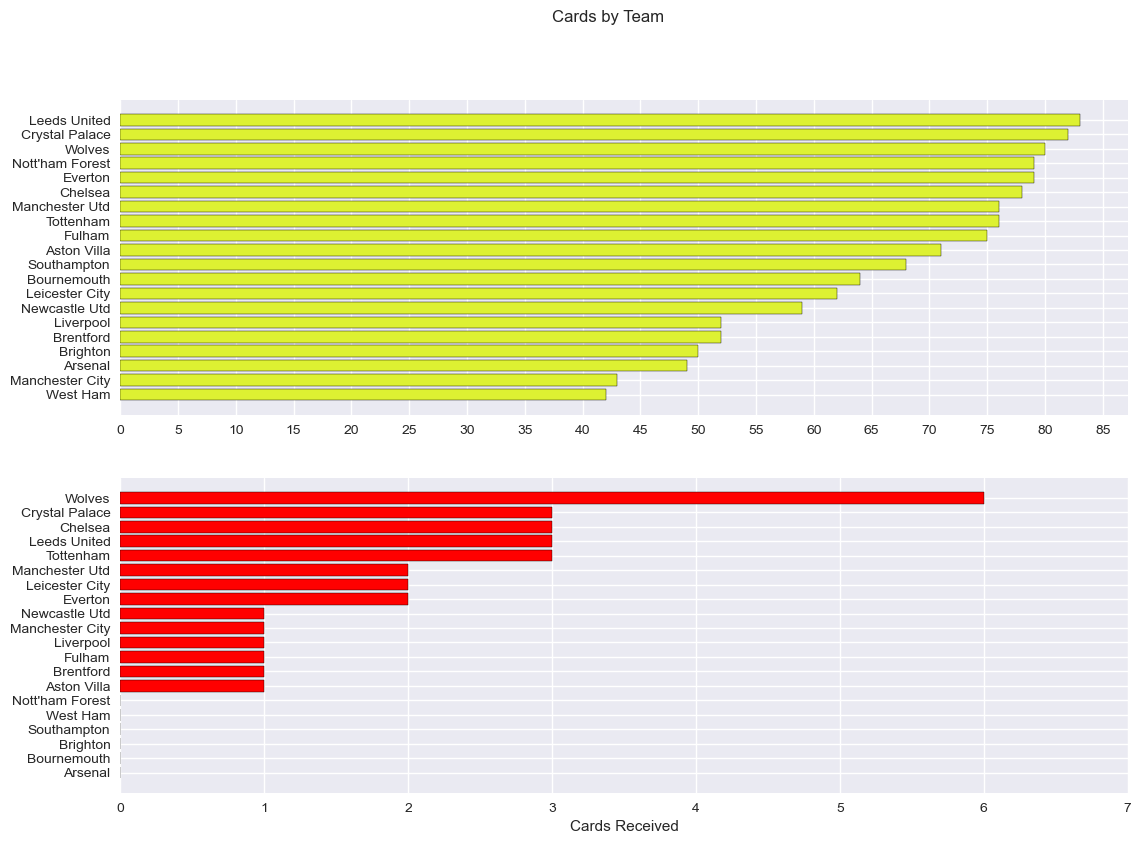

In [116]:
yellow_cards_df = clubs_df['Yellow Cards'].sum().sort_values(ascending=True)
red_cards_df = clubs_df['Red Cards'].sum().sort_values(ascending=True)

# Creating a list out of above df's to make it clearer
yel_teams = list(yellow_cards_df.index)
red_teams = list(red_cards_df.index)
yel_cards = list(yellow_cards_df)
red_cards = list(red_cards_df)
colors = ['#DDF132', 'red']

mean_yellows = clubs_df['Yellow Cards'].sum().mean()
mean_reds = clubs_df['Red Cards'].sum().mean()

# Creating subplots to make 2 separate plots in one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13,9))
fig.suptitle('Cards by Team')

# Setting both axes
ax1.barh(y=yel_teams, width=yel_cards, color=colors[0], edgecolor='black')
ax2.barh(y=red_teams, width=red_cards, color=colors[1], edgecolor='black')

ax2.set_xlabel('Cards Received')

# Setting correct x-axis ticks for both plots
ax1.set_xticks(np.arange(90, step=5))
ax2.set_xticks(np.arange(8, step=1));

In [108]:
yellow_cards_df.sort_values(ascending=False)

Squad
Leeds United       83
Crystal Palace     82
Wolves             80
Nott'ham Forest    79
Everton            79
Chelsea            78
Manchester Utd     76
Tottenham          76
Fulham             75
Aston Villa        71
Southampton        68
Bournemouth        64
Leicester City     62
Newcastle Utd      59
Liverpool          52
Brentford          52
Brighton           50
Arsenal            49
Manchester City    43
West Ham           42
Name: Yellow Cards, dtype: int32

Some teams take a rather aggressive stance on the pitch. It's done to block the opponents quick progression, to put additional pressure on them. Just to clarify, not all of the cards are given only because of fouls. There might also be some unsportsmanlike conducts like hitting the opposing player (unfortunately it happens sometimes), hitting a ball with a hand. Even non-players staff like managers and coaches can get a card (these are not counted in this dataset) if their behavior in the dugout (coaches zones on the pitch) is unacceptable.

Basically, fouls are an unavoidable part of the game. Some are purely tactical, to not allow a given player to advance, and some are the results of mistimed challenges. It appears that teams playing rather more offensively (Arsenal, Brighton, Man City, Newcastle) tend to get lesser amount of yellow cards. That's probably due to the fact that they're the ones who mostly are in possession of the ball - so there's less possibilies to commit a foul. 

Red cards don't have to be 'immediate' - a recipient can get one after acquiring two yellow cards, so besides Wolves' record (both in yellow and red cards) there's nothing out of the ordinary really.

Let's see what's going on with Leeds card record:

In [120]:
filt = df['Squad'] == 'Leeds United'
df[filt][['Player', 'Position', 'Yellow Cards', 'Red Cards', 'Minutes Played']].sort_values(by=['Yellow Cards', 'Red Cards', 'Minutes Played'], ascending=[False, False, True])

,Player,Position,Yellow Cards,Red Cards,Minutes Played
194,Degnand Gnonto,FW/MF,7,0,1294
332,Weston McKennie,MF,7,0,1295
427,Marc Roca,MF,7,0,2308
170,Junior Firpo,DF,6,1,1337
3,Tyler Adams,MF,6,1,2156
269,Robin Koch,DF,6,0,2995
430,Rodrigo,FW/MF,5,0,1755
104,Liam Cooper,DF,4,0,1336
366,Rasmus Nissen,DF,4,0,1780
490,Pascal Struijk,DF,4,0,2059


Leeds took this category winning spot from Wolves. We can see that 3 most often punished players are playing in the midfield, so it appears that they try to win the ball back quickly, not necessarily waiting for opponent to reach their defensive formation. It might also be due to individual errors and the desperate means to stop opponents before it's too late, which seem plausible since Leeds sits on 18th spot (as of 19-05-23) and their defense is known for it's low overall quality. 

Let's see if there's a player who's got more than 1 red card this season. It seems no one in Leeds can say that about themselves, let's see if someone outside of Leeds has achieved that:

In [121]:
filt = df['Red Cards'] > 1
df[filt][['Player','Position', 'Squad', 'Yellow Cards', 'Red Cards']]

,Player,Position,Squad,Yellow Cards,Red Cards
84,Casemiro,MF,Manchester Utd,7,2


It's only one player and it's Casemiro who plays usually in front of the defenders as a defensive midfielder. He's known for being a really tough guy on the pitch, one of the greatest defensive midfielders in the last 6-8 years in the world actually. Aggression and physicality is part of his game, and as we know everybody makes mistakes, so these cards were probably expected (no idea to which extend, though).

<a id="23"></a>
## Most and Least Efficient Goalscorers

Lastly, we'll check the differences between xGoals and goals actually scored by most and least efficient goalscorers in the league. I've chosen to select 10 players for each group of players:

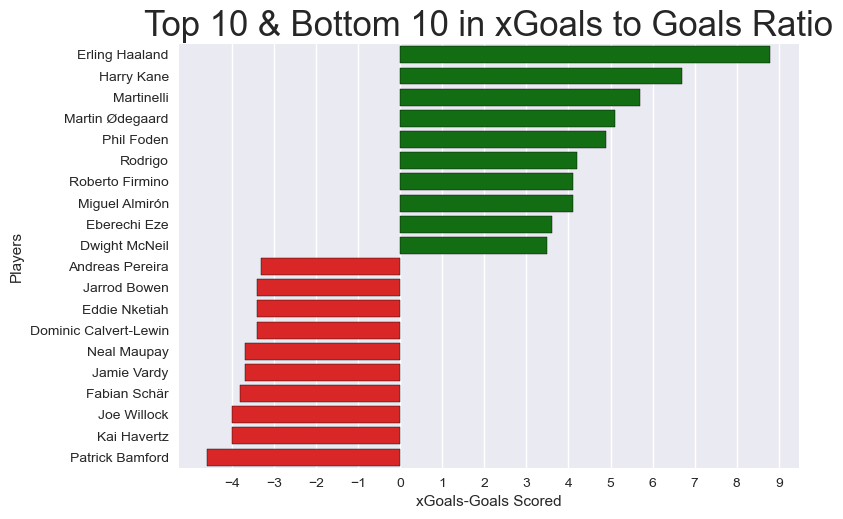

In [122]:
top_10_least_efficient_goal = df[['Player', 'xGoals-Goals']].sort_values(by='xGoals-Goals').head(10)
top_10_most_efficient_goal = df[['Player', 'xGoals-Goals']].sort_values(by='xGoals-Goals', ascending=False).head(10)

# Lists of names and goal diffs
bot_10_names = list(top_10_least_efficient_goal['Player'])
bot_10_goals = list(top_10_least_efficient_goal['xGoals-Goals'])
top_10_names = list(top_10_most_efficient_goal['Player'])
top_10_goals = list(top_10_most_efficient_goal['xGoals-Goals'])

names = bot_10_names + top_10_names
goals = bot_10_goals + top_10_goals

# Df containing all the info I need to create a plot
xg_df = pd.DataFrame({'Goals':goals, 'Names':names}).sort_values(by='Goals', ascending=False)

# Conditional color formatting
colors = ['green' if val > 0 else 'red' for val in xg_df['Goals']]

# plt.figure(figsize=(11,6))

ax = sns.barplot(x=xg_df['Goals'], y=xg_df['Names'], palette=colors, edgecolor='black', saturation=0.7)

# Setting x-axis ticks to clearly present the graph
ax.set_xticks(ticks=np.arange(-4,10))

plt.title('Top 10 & Bottom 10 in xGoals to Goals Ratio', size=25)
plt.xlabel('xGoals-Goals Scored')
plt.ylabel('Players');

<a id="24"></a>
### Top 10

<a href=https://www.transfermarkt.pl/harry-kane/detaillierteleistungsdaten/spieler/132098>H. Kane career record</a> 

No surprises here - E. Haaland is on top again. That's marvelous - based on stats he should've scored almost 9 less goals across the season. Data again shows how incredible and gamechanging this man is on the pitch, and he doesn't seem to stop, goals just keep coming.

G. Martinelli' also has a very good record this season, he naturally will have less opportunities to score, as he's a winger, not a central forward, but it doesn't seem to limit him that much. More than 6 goals scored than he should, very impressive. He was also present in Top 20 PL Goalscorers with a ratio of 0.52 goals/90 mins. As part of the offensive quartet of the unexpectedly titlechasing Arsenal (Jesus, Martinelli, Saka, Ødegaard) his numbers are bound to be high.

H. Kane as usual, already a legend at Tottenham (all career there aside from few short loans) is at the top 3 of such charts. Since 2014/2015 season he hasn't scored less than 17 goals in a single campaign. Astonishing consistency and the biggest reason Tottenham remain in the top of the league since he reached his optimal level.

What's also worth looking into is Roberto Firmino. Here we can see all of his stats:

In [123]:
filt = df['Player'] == 'Roberto Firmino'
df[filt]

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
169,Roberto Firmino,BRA,FW/MF,Liverpool,31,1991,23,12,1138,12.6,9,4,13,9,0,0,0,0,4.9,4.9,2.3,7.2,13,76,90,0.71,0.32,1.03,0.71,1.03,0.38,0.18,0.57,0.38,0.57,4.1,1.7


Even though he's not as much used as in previous seasons, he certainly makes the most of his time on the pitch (played only 12.6 matches across all seasons, that's less than half of games played already). Over 1 Goals+Assists/90 means that statistically every match he plays he's contributing to one goal. He also scored 4.1 goals and provided 1.7 assists more than he should. A gem of a player in my opinion, both him and Liverpool confirmed that he's gonna leave PL at the end of the season, he'll certainly be missed here.

<a id="25"></a>
### Bottom 10

Let's see the 3 players with lowest Goal-xGoal ratio:

In [126]:
filt = df['Player'].isin(['Joe Willock', 'Kai Havertz', 'Patrick Bamford'])
df[filt]

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
43,Patrick Bamford,ENG,FW,Leeds United,29,1993,27,17,1482,16.500000,4,2,6,4,0,2,3,0,8.6,7.0,1.0,8.0,16,23,93,0.24,0.12,0.36,0.24,0.36,0.52,0.06,0.58,0.43,0.49,-4.6,1.0
216,Kai Havertz,GER,FW/MF,Chelsea,23,1999,32,27,2364,26.299999,7,1,8,6,1,1,4,0,11.0,10.2,3.4,13.6,54,75,199,0.27,0.04,0.30,0.23,0.27,0.42,0.13,0.55,0.39,0.52,-4.0,-2.4
541,Joe Willock,ENG,MF,Newcastle Utd,23,1999,35,31,2559,28.400000,3,6,9,3,0,0,1,0,7.0,7.0,6.0,13.0,97,121,152,0.11,0.21,0.32,0.11,0.32,0.25,0.21,0.46,0.25,0.46,-4.0,0.0


Kai Havertz is the symbol of Chelsea's downfall this season. Based on the data, he should've scored 4 more goals than he did. Perhaps these goals would earn the valuable points and a higher spot on the table, sadly Chelsea became quite a meme this term. 

P. Bamford now occupies the lowest place in this table, even though he had chances to turn his situation around at least a little bit. He went from -3.6 to -4.6 Goals-xGoals ratio. As Havertz can be considered Chelsea's ineptness symbol, Bamford can be recognized as Leeds's. There's still a chance for Bamford & Leeds to stay in the Prem for future season, but I suppose majority of fans wouldn't be surprised by that outcome.

In [127]:
filt = df['Player'] == 'Fabian Schär'
df[filt]

,Player,Nation,Position,Squad,Age,Born,Matches Played,Starts,Minutes Played,90s,Goals,Assists,Goals+Assists,Non-Pen Goals,Pen Goals,Pen Attempts,Yellow Cards,Red Cards,xGoals,Non-Pen xGoals,xAssistedGoals,Non-Pen xGoals+xAssistedGoals,Progressive Carries,Progressive Passes,Progressive Passes Received,Goals/90,Assists/90,Goals+Assists/90,Non-Pen Goals/90,Non-Pen Goals+Assists/90,xGoals/90,xAssistedGoals/90,xGoals+xAssistedGoals/90,Non-Pen xGoals/90,Non-Pen xGoals+xAssistedGoals/90,xGoals-Goals,xAssistedGoals-Assists
457,Fabian Schär,SUI,DF,Newcastle Utd,31,1991,34,34,3026,33.599998,1,3,4,1,0,0,7,0,4.8,4.8,3.2,7.9,25,131,26,0.03,0.09,0.12,0.03,0.12,0.14,0.09,0.24,0.14,0.24,-3.8,-0.2


What's also interesting is the presence of Fabian Schär in this graph. He's the central defender so theroretically he shouldn't even appear in the graph. But why is he there? Based on the data, he should've scored 4.8 goals in total, when he scored only one. As for central defenders, he's really good in the element of shooting from distance or free kicks execution, from time to time, when the opportunity arises he's taking a shot from good 25-35 meters. He's also quite prominent at heading element, so he naturally tries to get some space when there's a corner kick or other opportunity to get into opponent penalty area. Sum up all the chances he got after taking consideration in the shooting element, and we've got an answer about his expected goals to goals scored difference value. He should've been more efficient, but since he's a defender (in the starting lineup all the time) I believe that the coach doesn't care that much as long as he carries out his main responsibilities.

<a id="26"></a>
# Summary

Summing up, here are the some key insights from the analysis (as of 24-04-2023):

- E. Haaland absolutely dominated the league in terms of goalscoring, as Kevin De Bruyne did with assisting. Manchester City superstars make their presence loud & clear.

- Average PL player age is 26.22 years old.

- Non-surprisingly, English players make up over 30% of all league players.

- There are 63 different nationalities represented this season.

- 76% of penalty kicks resulted in a goal.

- Arsenal, Manchester City and Liverpool are the most progressively playing teams in the PL.

- Defenders are producing the best progressive passing numbers in the progressive passing this season.

- Leeds United collected the most yellow cards this season (83).

- E. Haaland, H. Kane and G. Martinelli made the most of their possible scoring situations, while J. Willock, K. Havertz and P. Bamford are on the other side of the spectrum.

Even though we've found out a lot about this season in PL, there's still an enormous amount of information or insights to be pulled from this dataset. Considering this is only about the players, we can imagine how many things can be discovered, if I joined this dataset with other sets available on <a href='https://fbref.com/en/'>fbref.com</a>. I'll probably build some more analysis on the subject once the season is over so it can be summed up in better fashion. 

**Thanks for reading and have a nice day!**